In [2]:
#import libraries

import pandas as pd
import numpy as np
from sklearn import linear_model
import statistics as st
import matplotlib as plt
import matplotlib.mlab as mlab
import scipy.stats as ss
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
from statsmodels.stats.power import TTestIndPower
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from sklearn import metrics


In [3]:
# Load Boston Housing Data

from sklearn.datasets import load_boston
boston = load_boston()


In [4]:
# Understand what it contains

print(boston.keys())
boston.DESCR


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [5]:
# Transform the data set into data frame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Add 'target column' (MEDV)

df['MEDV'] = boston.target
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Objective 1 Choose a variable other than CHAS and MEDV (the target, median home price).


In [8]:
# Load data for percentage of lower status of the population.

lowstatus = df['LSTAT']


In [9]:
# Compute the standard deviation  of the variable

print("Standard Deviation for low status of the population is", st.stdev(lowstatus))


Standard Deviation for low status of the population is 7.14106151134857


In [10]:
# and mean of the variable.

print("The mean for the low status of the population is ", st.mean(lowstatus))
print("The median for the low status of the population is ", st.median(lowstatus))
lowstatus.describe()


The mean for the low status of the population is  12.65306324110672
The median for the low status of the population is  11.36


count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

Text(0, 0.5, 'Number of Houses')

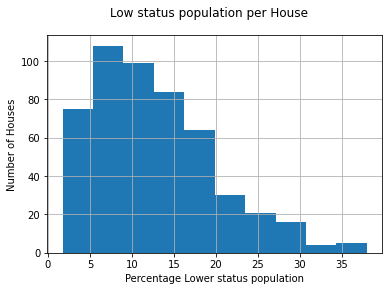

In [11]:
# Create histograms for lower status of the population.

lowstatus.hist(bins=10)
pl.suptitle("Low status population per House")
pl.xlabel("Percentage Lower status population")
pl.ylabel("Number of Houses")


In [12]:
# High skew  > .80

skew(lowstatus)


0.9037707431346133

In [13]:
# Create a sample correlation between lower status of the population adn median home price.

med_val = df['MEDV']
print(med_val)


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [14]:
# Create a heatmap with a correlation matrix to measure linear relationships between variables.

lowstatus.corr(med_val)
med_val.corr(lowstatus)


-0.7376627261740147

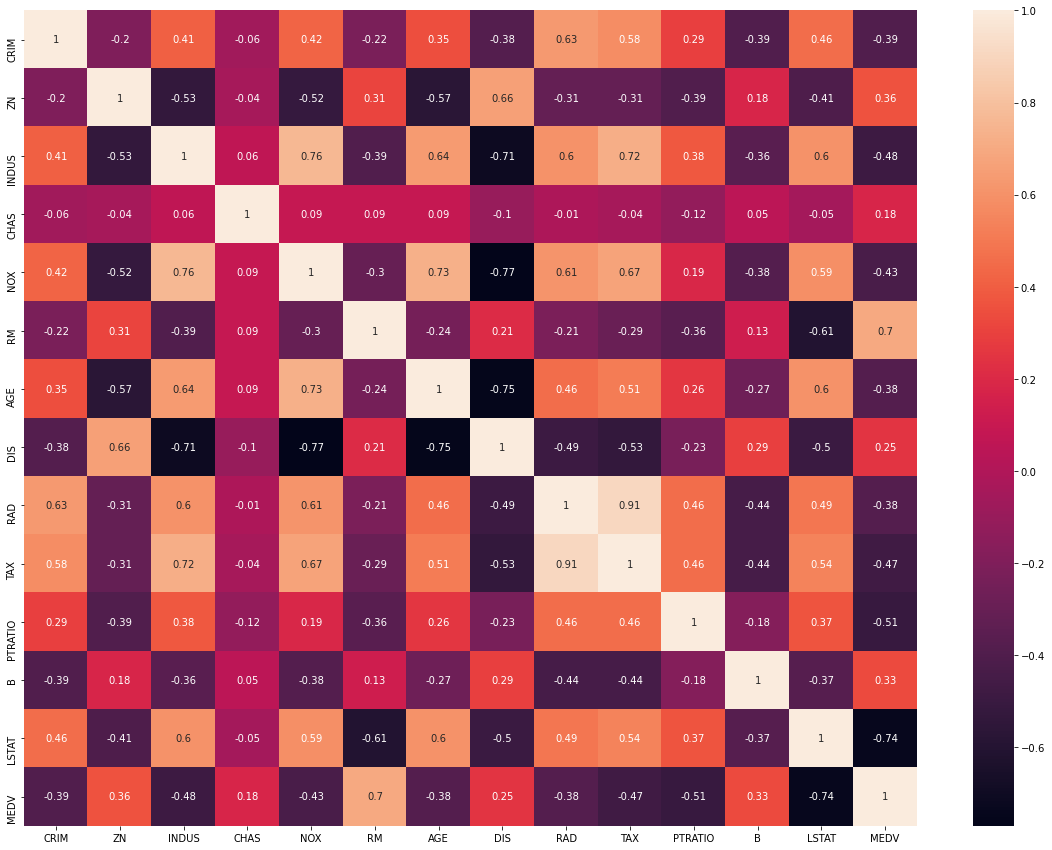

In [15]:
correlation_matrix = df.corr().round(2)
plt.subplots(figsize=(20, 15))
sns.heatmap(data=correlation_matrix, annot=True)


In [16]:
# Perform a regression, predicting median home price and the lower status of the population.


In [17]:
# Create new data frame for a linear regression

df_linreg = pd.DataFrame(df, columns=['LSTAT', 'MEDV'])
df_linreg.describe


<bound method NDFrame.describe of      LSTAT  MEDV
0     4.98  24.0
1     9.14  21.6
2     4.03  34.7
3     2.94  33.4
4     5.33  36.2
..     ...   ...
501   9.67  22.4
502   9.08  20.6
503   5.64  23.9
504   6.48  22.0
505   7.88  11.9

[506 rows x 2 columns]>

In [18]:
# Preparing data to train for a linear regression

X = df_linreg['LSTAT'].values.reshape(-1, 1)
Y = df_linreg['MEDV'].values.reshape(-1, 1)


In [19]:
# Splitting the data into training and testing sets, 80% training 20 % test

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size=0.8, random_state=0)



In [20]:
# Training and testing the model

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)


LinearRegression()

In [21]:
# Load predicted values , model evaluations

Y_pred = lin_model.predict(X_test)

predict_test = pd.DataFrame(
    {'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})

predict_test.head(10)


,Actual,Predicted
0,22.6,27.744574
1,50.0,25.649866
2,23.0,24.722073
3,8.3,15.855433
4,21.2,22.962136
5,19.9,26.663743
6,20.6,23.813410
7,18.7,25.879423
8,16.1,22.675189
9,18.6,24.597729


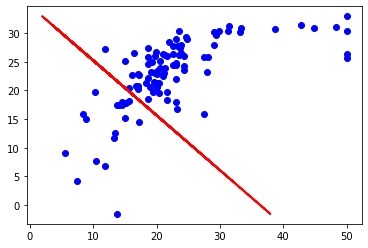

In [22]:
# Plotting the y_test vs y_pred

plt.scatter(Y_test, Y_pred, color='blue')
pl.plot(X_test, Y_pred, color='red', linewidth=2)
plt.show()


In [23]:
lin_model.score(X, Y)


0.5439214616845225

In [24]:
# Retrieving the slope

print(lin_model.coef_)


[[-0.95648761]]


In [25]:
# root mean square error of the model

print(np.mean((Y_pred - Y_test)**2))


46.33630536002592


In [26]:
# Objective 2 Theory tracts that the border the Charles River(CHAS) will have higher median price (MEDV or target) than those that do not.


In [27]:
# Creating two series to use dataframes based on the CHAS value

chas_0 = df['CHAS'] == 0
chas_1 = df['CHAS'] == 1


In [28]:
# Creating two dataframesfor homes along the river and the ones that are not

df_chas_0 = df[chas_0]
df_chas_1 = df[chas_1]
print("Number of homes total in the sample are:     ", len(df))
print('Number of homes that are not along the river are:', len(df_chas_0))
print('Number of homes that bound along the river are: ', len(df_chas_1))

print("The mean housing price away from the CHarles river:",
      np.mean(df_chas_0['MEDV']))

print("The mean housing price close to the Charles river:",
      np.mean(df_chas_1['MEDV']))


Number of homes total in the sample are:      506
Number of homes that are not along the river are: 471
Number of homes that bound along the river are:  35
The mean housing price away from the CHarles river: 22.093842887473482
The mean housing price close to the Charles river: 28.44


In [29]:
# Train model

model = smf.ols('MEDV ~ CHAS', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           7.39e-05
Time:                        17:53:20   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.0938      0.418     52.902      0.0

In [30]:
# Creating confidence interval for prices along the charles river

info = df_chas_1['MEDV']

ss.t.interval(alpha=0.90, df=len(info)-1,
              loc=np.mean(info), scale=ss.sem(info))


(25.062586315862976, 31.817413667029342)

In [31]:
# group size to satisfy 80% of power with effect size of .6
# analysis

effect_size = .6
alpha = .10
power = .8


In [32]:
# perform power analysis

analysis = TTestIndPower()

sample_size = analysis.solve_power(
    effect_size=effect_size, power=power, alpha=alpha)
# required sample size

print(format(sample_size))


35.042258702728816


In [33]:
# features: Transportation Infrastructure(Bus Stations, Refueling depots, warehouses, airports)
# Retail/shopping areas, and Centralbusiness Districts (CBD) the closer to the CBD you get, the higher the land values will be.
